In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Question-1 (Bagging)

## Loading dataset

In [4]:
X, y = make_moons(n_samples=1000, random_state=42, noise=0.3)

In [5]:
df = pd.DataFrame(X)
df.columns = ['feature1', 'feature2']
df['label'] = y

In [6]:
df

feature1  feature2  label
0   -0.171863  0.596249      1
1    1.253283 -0.265414      1
2    0.723224  0.231943      1
3   -0.065198 -0.655194      1
4   -0.799493  0.552935      0
..        ...       ...    ...
995  0.861014  0.343843      0
996 -0.229425  0.754849      0
997  1.770957 -0.509436      1
998 -1.061772  0.006786      0
999  0.761172  0.651960      0

[1000 rows x 3 columns]

## Preprocessing

In [7]:
df.describe()

feature1     feature2       label
count  1000.000000  1000.000000  1000.00000
mean      0.495520     0.241961     0.50000
std       0.917175     0.571628     0.50025
min      -1.669007    -1.257494     0.00000
25%      -0.134887    -0.209607     0.00000
50%       0.502420     0.234512     0.50000
75%       1.127110     0.695783     1.00000
max       2.863928     1.740967     1.00000

In [8]:
df.isnull().sum()

feature1    0
feature2    0
label       0
dtype: int64

In [9]:
for each in df.columns:
    print('Number of unique entries in', each, ':', len(df[each].unique()))

Number of unique entries in feature1 : 1000
Number of unique entries in feature2 : 1000
Number of unique entries in label : 2


## Visualization of the generated dataset

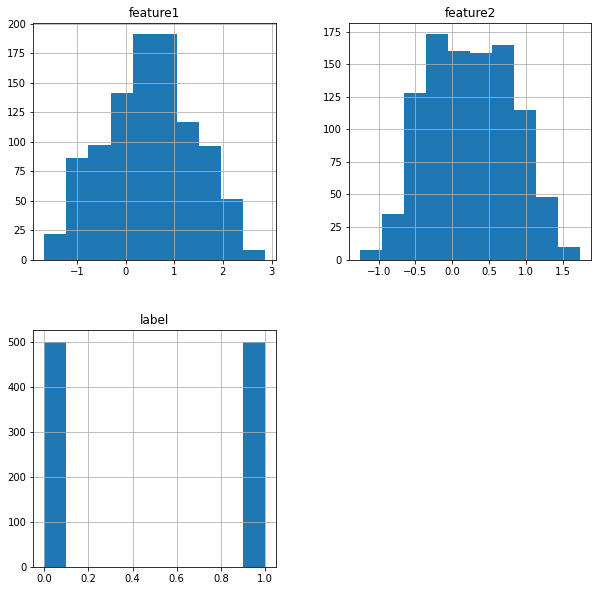

In [10]:
df.hist(figsize=(10,10))
plt.show()

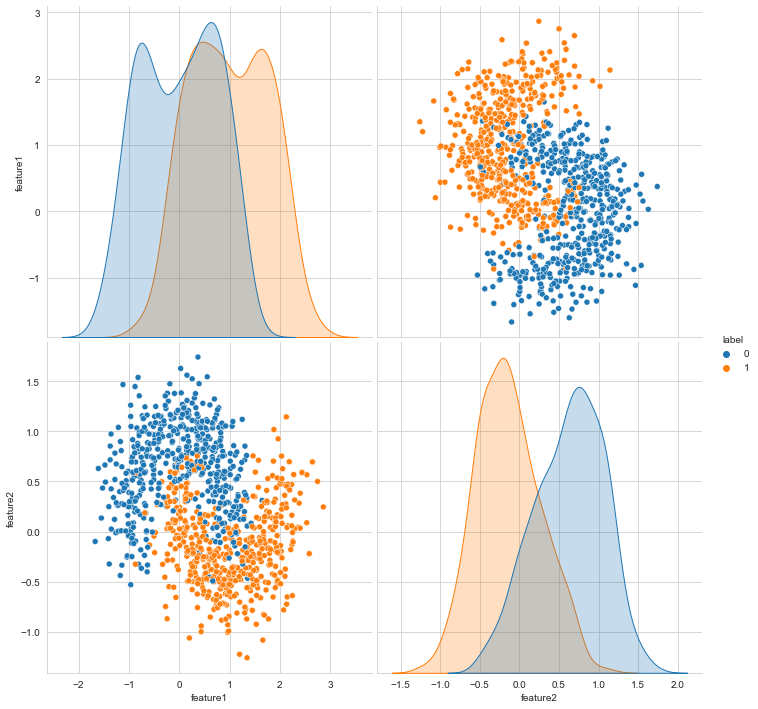

In [11]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="label", size=5);
plt.show()

## Train and Test Split

In [12]:
features = df.columns.tolist()[:-1]
X = df[features]
y = df['label']

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

## Function for plotting decision boundary

In [14]:
def plot_decision_boundary(classifier, train_X, train_y, feature1, feature2, figsize=(10,10)):
    h = 0.02
    
    xf1 = train_X[feature1].to_numpy()
    xf2 = train_X[feature2].to_numpy()
    train_y = train_y.to_numpy()
    
    x_min, x_max = xf1.min() - 10*h, xf1.max() + 10*h
    y_min, y_max = xf2.min() - 10*h, xf2.max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=figsize)
    plt.contourf(xx, yy, Z, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    
    plt.scatter(xf1, xf2, c=train_y, edgecolors='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

## Function for hyperparameter tuning by varying max_depth in Decision Tree Classifier

In [15]:
def hyperparam_tuning(train_X, train_y, test_X, test_y, max_depth=None):
    model = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    accuracy = model.score(test_X, test_y)
    print(f'Accuracy at max_depth={max_depth}:', accuracy)
    # return (max_depth, accuracy)

## Function for plotting decision boundary of the Decision Tree Classifier

In [16]:
def plot_decision_tree_boundary(train_X, train_y, feature1, feature2, max_depth=None, figsize=(10,10)):
    model = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    model.fit(train_X, train_y)
    plot_decision_boundary(model, train_X, train_y, feature1, feature2, figsize)

## Training simple Decision Tree Classifier

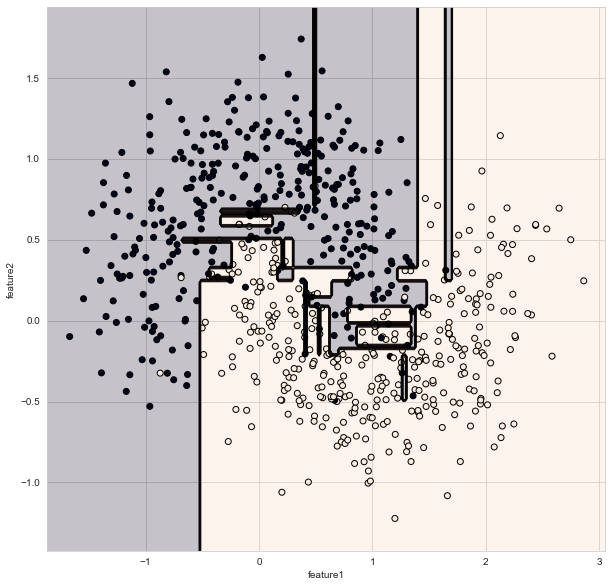

In [17]:
plot_decision_tree_boundary(train_X, train_y, 'feature1', 'feature2')

In [18]:
hyperparam_tuning(train_X, train_y, test_X, test_y)

Accuracy at max_depth=None: 0.8866666666666667


##  Finding the best value of max_depth of the Decision Tree

In [19]:
for depth in range(1,20):
    hyperparam_tuning(train_X, train_y, test_X, test_y, max_depth=depth)

Accuracy at max_depth=1: 0.81
Accuracy at max_depth=2: 0.8966666666666666
Accuracy at max_depth=3: 0.8966666666666666
Accuracy at max_depth=4: 0.8933333333333333
Accuracy at max_depth=5: 0.9033333333333333
Accuracy at max_depth=6: 0.91
Accuracy at max_depth=7: 0.9033333333333333
Accuracy at max_depth=8: 0.8833333333333333
Accuracy at max_depth=9: 0.8766666666666667
Accuracy at max_depth=10: 0.9
Accuracy at max_depth=11: 0.8933333333333333
Accuracy at max_depth=12: 0.89
Accuracy at max_depth=13: 0.8933333333333333
Accuracy at max_depth=14: 0.89
Accuracy at max_depth=15: 0.8866666666666667
Accuracy at max_depth=16: 0.8866666666666667
Accuracy at max_depth=17: 0.8866666666666667
Accuracy at max_depth=18: 0.8866666666666667
Accuracy at max_depth=19: 0.8866666666666667


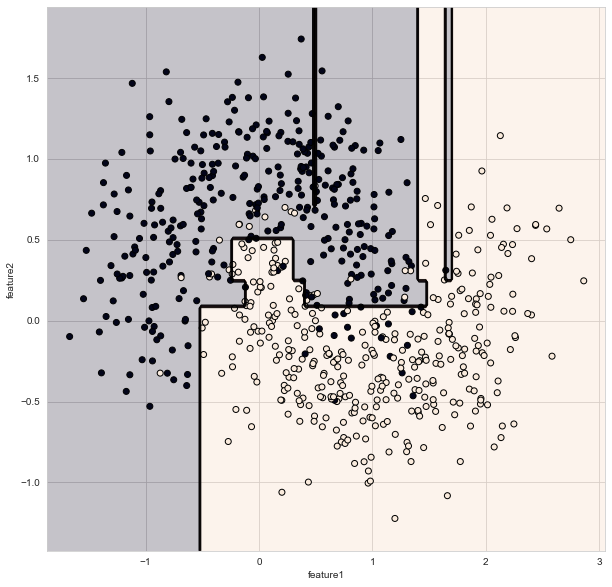

In [20]:
best_max_depth = 6
plot_decision_tree_boundary(train_X, train_y, 'feature1', 'feature2', max_depth=best_max_depth)

## BaggingClassifier

In [21]:
def bagging_classifier(train_X, train_y, test_X, test_y, feature1, feature2, n_estimators=10, figsize=(10,10)):
    bagging_clf = BaggingClassifier(random_state=0, n_estimators=n_estimators)
    bagging_clf.fit(train_X, train_y)
    print(f'Bagging Classifier Accuracy for n_estimators={n_estimators}:', bagging_clf.score(test_X, test_y))
    plot_decision_boundary(bagging_clf, train_X, train_y, feature1, feature2, figsize=figsize)

Bagging Classifier Accuracy for n_estimators=10: 0.9066666666666666


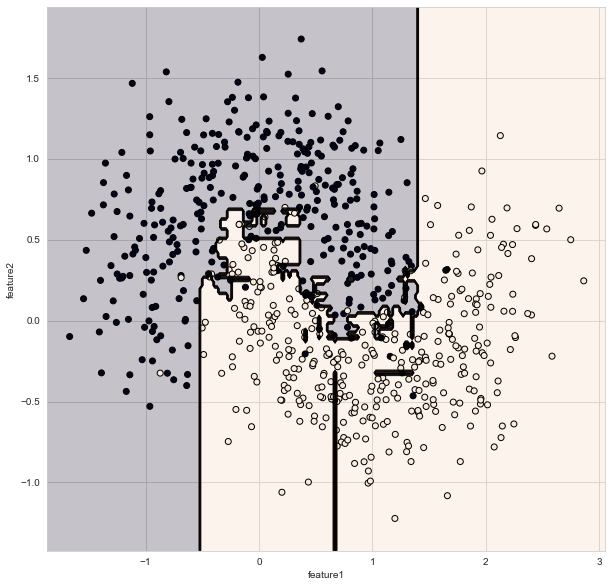

In [22]:
bagging_classifier(train_X, train_y, test_X, test_y, 'feature1', 'feature2')

In [23]:
bagging_clf = BaggingClassifier(random_state=0)
bagging_clf.fit(train_X, train_y)
bagging_clf.score(test_X, test_y)

0.9066666666666666

## RandomForestClassifier

In [24]:
def randomforest_classifier(train_X, train_y, test_X, test_y, feature1, feature2, n_estimators=100, figsize=(10,10)): 
    rf_clf = RandomForestClassifier(random_state=0, n_estimators=n_estimators)
    rf_clf.fit(train_X, train_y)
    print(f'Random Forest Classifier Accuracy for n_estimators={n_estimators}:', rf_clf.score(test_X, test_y))
    plot_decision_boundary(rf_clf, train_X, train_y, feature1, feature2, figsize=figsize)

Random Forest Classifier Accuracy for n_estimators=100: 0.9133333333333333


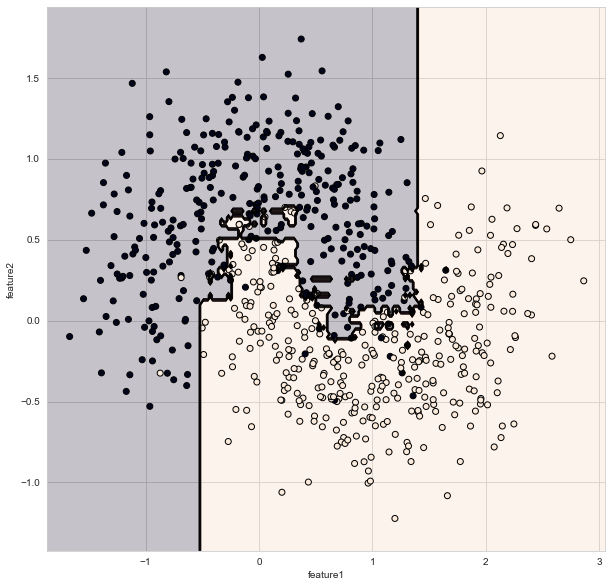

In [25]:
randomforest_classifier(train_X, train_y, test_X, test_y, 'feature1', 'feature2')

In [26]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(train_X, train_y)
rf_clf.score(test_X, test_y)

0.9133333333333333

### Comparision among the 3 models
Evident from the decision boundary plots, RandomForestClassifier worked the best and DecsionTreeClassifier worked the worst.  
The reported accuracy metrics were in the order: RandomForestClassifier > BaggingClassifier > DecisionTreeClassifier

## Varying the number of estimators for the BaggingClassifier

Bagging Classifier Accuracy for n_estimators=5: 0.9


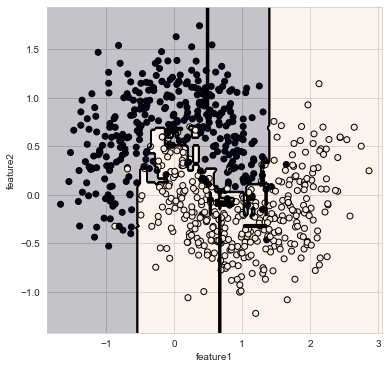

Bagging Classifier Accuracy for n_estimators=6: 0.8966666666666666


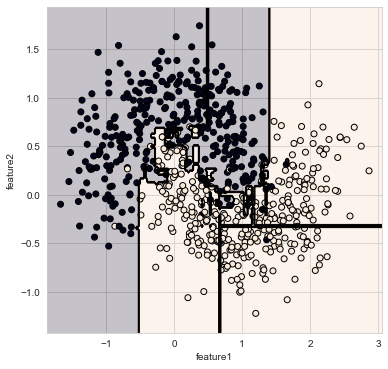

Bagging Classifier Accuracy for n_estimators=7: 0.9


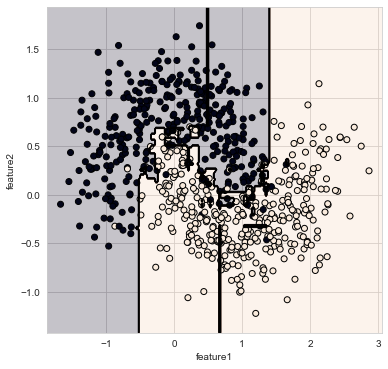

Bagging Classifier Accuracy for n_estimators=8: 0.8933333333333333


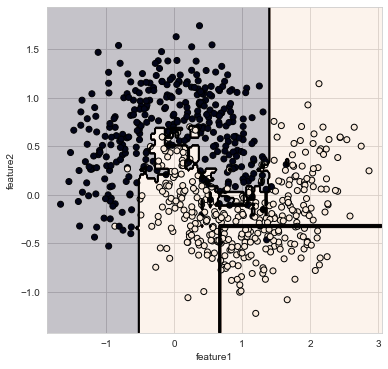

Bagging Classifier Accuracy for n_estimators=9: 0.9


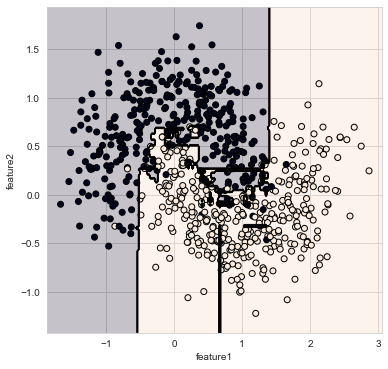

Bagging Classifier Accuracy for n_estimators=10: 0.9066666666666666


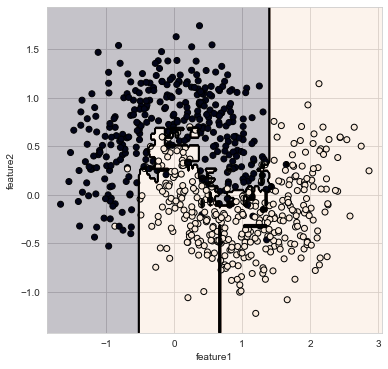

Bagging Classifier Accuracy for n_estimators=11: 0.9033333333333333


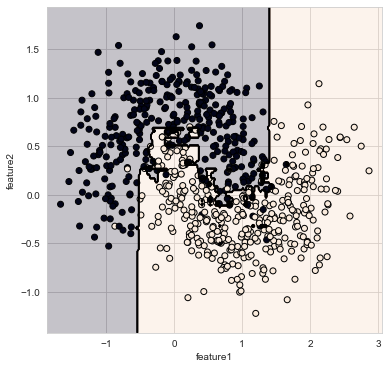

Bagging Classifier Accuracy for n_estimators=12: 0.9033333333333333


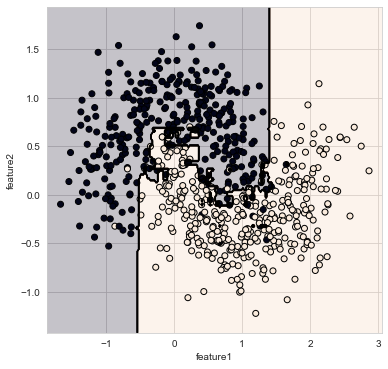

Bagging Classifier Accuracy for n_estimators=13: 0.9033333333333333


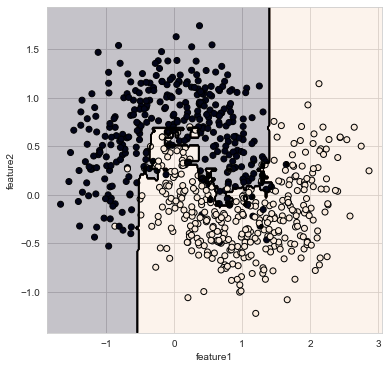

Bagging Classifier Accuracy for n_estimators=14: 0.9033333333333333


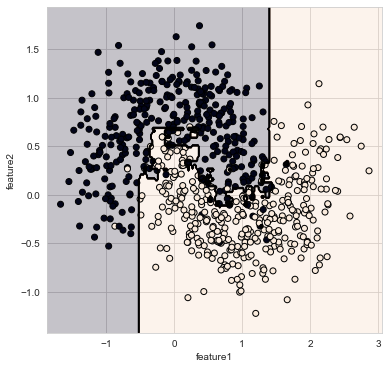

Bagging Classifier Accuracy for n_estimators=15: 0.9


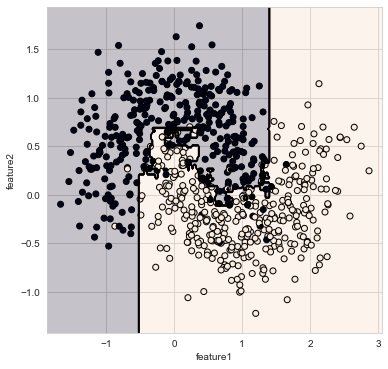

In [27]:
for estimators in range(5,16):
    bagging_classifier(train_X, train_y, test_X, test_y, 'feature1', 'feature2', n_estimators=estimators, figsize=(6,6))

## Varying the number of estimators for the RandomForestClassifier

Random Forest Classifier Accuracy for n_estimators=50: 0.91


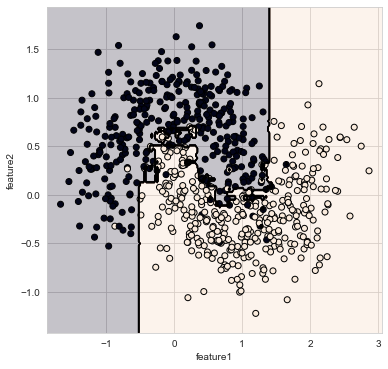

Random Forest Classifier Accuracy for n_estimators=60: 0.91


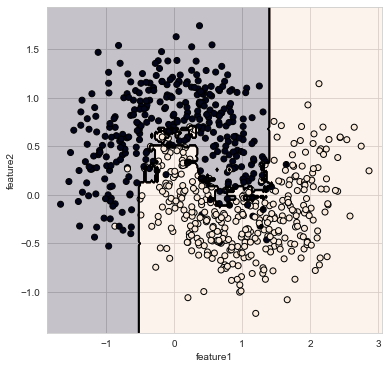

Random Forest Classifier Accuracy for n_estimators=70: 0.9133333333333333


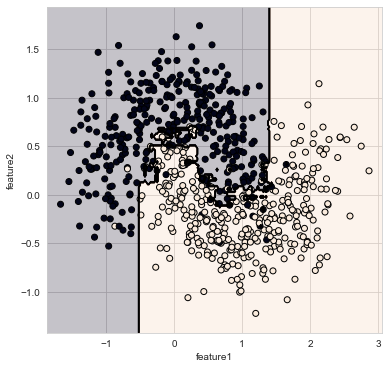

Random Forest Classifier Accuracy for n_estimators=80: 0.91


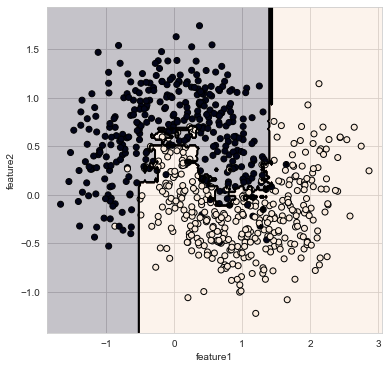

Random Forest Classifier Accuracy for n_estimators=90: 0.9133333333333333


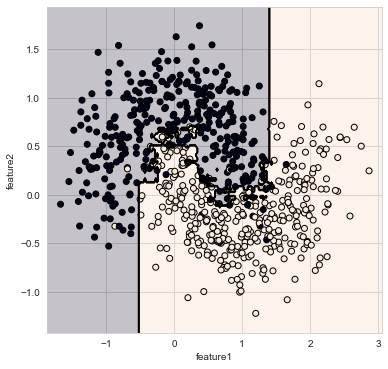

Random Forest Classifier Accuracy for n_estimators=100: 0.9133333333333333


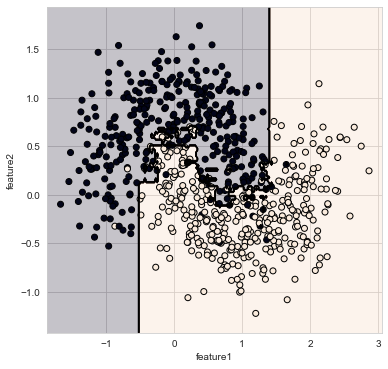

Random Forest Classifier Accuracy for n_estimators=110: 0.91


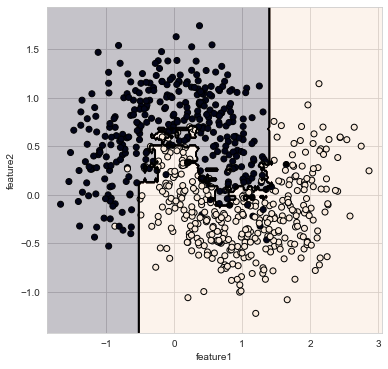

Random Forest Classifier Accuracy for n_estimators=120: 0.91


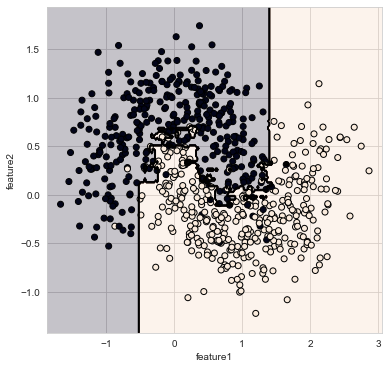

In [59]:
for estimators in range(50,121,10):
    randomforest_classifier(train_X, train_y, test_X, test_y, 'feature1', 'feature2', n_estimators=estimators, figsize=(6,6))

## Implementing Bagging Algorithm from scratch

In [29]:
class BaggingClf:
    
    def __init__(self, n_estimators=10):
        '''
        Input: number of estimators
        
        Here, we have assumed that the default estimator is DecisionTreeClassifier        
        '''
        self.n_estimators = n_estimators
        
        # defining empty arrays to store the trained models/estimators,
        # the samples from the dataset and the labels of the samples they used in training and labels 
        self.estimators = list()
        self.fit_sample_datasets = list()
        self.fit_sample_labels = list()
        
    
    def fit(self, train_X, train_y):
        '''
        Input: training dataset, training labels
        
        Trains the Bagging Classifier on the provided training dataset
        '''
        # converting and combining the training dataset and labels into a Pandas dataframe for easy use
        train_df = pd.DataFrame(train_X)
        train_df['label'] = train_y
        
        # number of samples in the training dataset
        num_samples = len(train_df)
        
        # loop for training the estimators to be used in the predictions
        for estimators in range(self.n_estimators):
            # taking random samples from the training dataset (with replacement)
            # sample function of Pandas used for random sampling based on the fraction of samples we need from the dataset
            
            sample_df = train_df.sample(frac=1.0, replace=True)
            
            # dividing back the sampled dataframe into features and labels for training
            Features = sample_df.columns.tolist()[:-1]
            sample_train_X = sample_df[Features]
            sample_train_y = sample_df['label']
            
            # using sklearn' s inbuilt DecisionTreeClassifier for training
            model = DecisionTreeClassifier(random_state=0)
            model.fit(sample_train_X, sample_train_y)
            
            # appending the model to the list of the estimators (to be used in predictions)
            self.estimators.append(model)
            self.fit_sample_datasets.append(sample_train_X)
            self.fit_sample_labels.append(sample_train_y)
    
    
    def majority_voting(self, predictions):
        '''
        Input: matrix containing predictions of all the estimators
        
        Returns the predictions for the test dataset based on the majority voting from the predictions of all the estimators        
        '''
        # defining an empty array to store the final predictions after majority voting
        majority_predictions = list()
        
        # taking transpose of the matrix to deal with the predictions datapoint-wise
        for pred in predictions.T:
            # bincount function of numpy counts the occurence of each unique element
            # argmax returns the element with the most occurences
            majority_predictions.append(np.bincount(pred).argmax())
            
        return majority_predictions        
    
    
    def predict(self, test_X):
        '''
        Input: test dataset (without labels)
        
        Returns predictions for the passed test dataset
        '''
        # defining an empty array to store the prediction arrays for each estimator
        predictions = list()
        
        # loop to append the predictions of each estimator
        for model in self.estimators:
            predictions.append(model.predict(test_X))
        
        # converting into numpy array for easy operations in majority voting
        predictions = np.array(predictions)
        
        # returning the predictions after the majority voting
        return np.array(self.majority_voting(predictions))
    
    
    def score(self, test_X, test_y):
        '''
        Input: test dataset, test labels
        
        Returns the accuracy score of the Bagging Classifier for the test dataset
        '''
        test_y = np.array(test_y)
        predictions = self.predict(test_X)
        
        # finding accuracy using the formula: (total correct predictions)/(total predictions)
        accuracy = 0
        for each in range(len(predictions)):
            if predictions[each] == test_y[each]:
                accuracy += 1
        accuracy/=len(test_y)    
        
        return accuracy
    

    def individual_estimator_performance(self, test_X, test_y):
        '''
        Input: test dataset, test labels
        
        Shows performance of the individual estimators (trees) numerically and visually 
        '''
        for each in range(self.n_estimators):
            print(f'Accuracy score for estimator-{each+1}:', self.estimators[each].score(test_X, test_y))
            Features = self.fit_sample_datasets[each].columns.tolist()
            plot_decision_boundary(self.estimators[each], self.fit_sample_datasets[each], self.fit_sample_labels[each], Features[0], Features[1], figsize=(5,5))
            print('Decision boundary for the corresponding sample from the dataset.\n')
            print("."*100)
            print()
            print()
        pass
    
    
    def average_estimators_performance(self, test_X, test_y):
        '''
        Input: test dataset, test labels
        
        Returns the average of the accuracy scores of all the estimators
        '''
        avg_score = 0
        for each in range(self.n_estimators):
            avg_score += self.estimators[each].score(test_X, test_y)
        avg_score/=self.n_estimators
        
        return avg_score

In [30]:
scratch = BaggingClf()
scratch.fit(train_X, train_y)

In [31]:
scratch.predict(test_X)

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1], d

In [32]:
scratch.score(test_X, test_y)

0.91

## Performance of each individual estimator (Tree) in the BaggingClassifier

Accuracy score for estimator-1: 0.8966666666666666


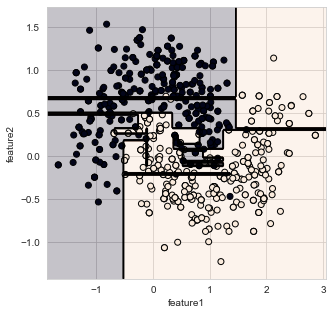

Decision boundary for the corresponding sample from the dataset.

....................................................................................................


Accuracy score for estimator-2: 0.8833333333333333


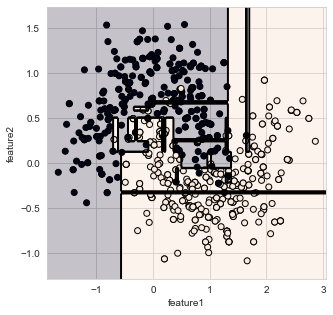

Decision boundary for the corresponding sample from the dataset.

....................................................................................................


Accuracy score for estimator-3: 0.8733333333333333


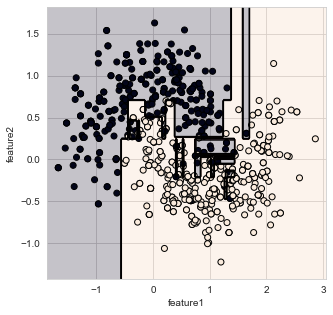

Decision boundary for the corresponding sample from the dataset.

....................................................................................................


Accuracy score for estimator-4: 0.87


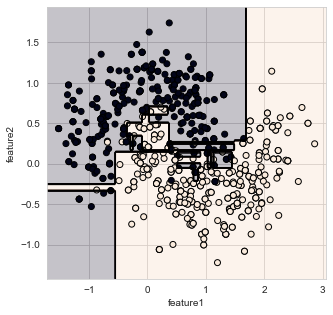

Decision boundary for the corresponding sample from the dataset.

....................................................................................................


Accuracy score for estimator-5: 0.8933333333333333


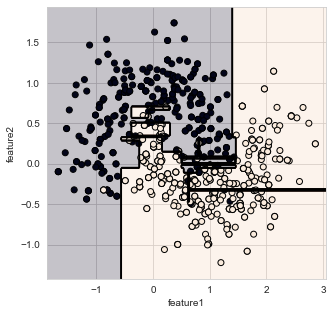

Decision boundary for the corresponding sample from the dataset.

....................................................................................................


Accuracy score for estimator-6: 0.8966666666666666


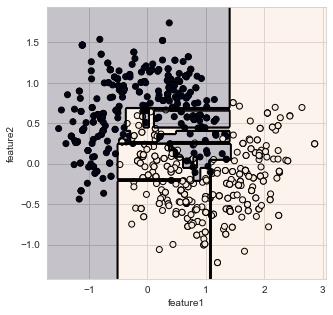

Decision boundary for the corresponding sample from the dataset.

....................................................................................................


Accuracy score for estimator-7: 0.8833333333333333


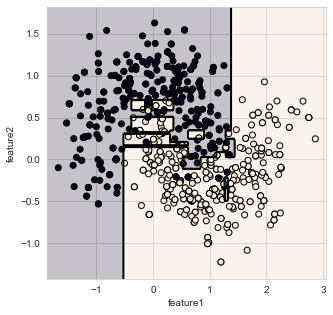

Decision boundary for the corresponding sample from the dataset.

....................................................................................................


Accuracy score for estimator-8: 0.9


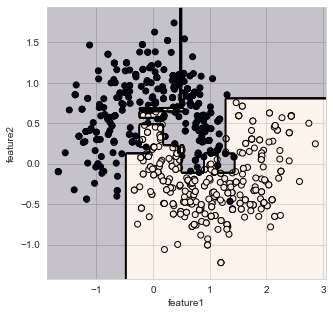

Decision boundary for the corresponding sample from the dataset.

....................................................................................................


Accuracy score for estimator-9: 0.8866666666666667


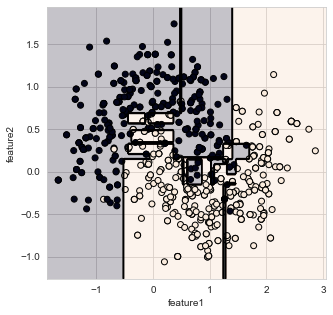

Decision boundary for the corresponding sample from the dataset.

....................................................................................................


Accuracy score for estimator-10: 0.8733333333333333


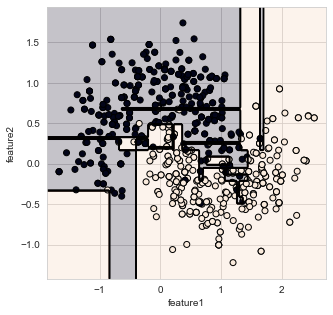

Decision boundary for the corresponding sample from the dataset.

....................................................................................................




In [33]:
scratch.individual_estimator_performance(test_X, test_y)

## Average performance (accuracy score) of the estimators

In [34]:
scratch.average_estimators_performance(test_X, test_y)

0.8856666666666667

---
# Question-2
---

In [35]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0)

## Training an AdaBoost Model

In [36]:
ab_model = AdaBoostClassifier()
ab_model.fit(train_X, train_y)

AdaBoostClassifier()

In [37]:
ab_model.score(test_X, test_y)

0.8966666666666666

## Training an XGBoost Model

In [38]:
xgb_model = XGBClassifier(subsample=0.7)
xgb_model.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
xgb_model.score(test_X, test_y)

0.9066666666666666

## Training a LightGBM Model

In [40]:
def lightGBM(train_X, train_y, test_X, test_y, max_depth=-1, num_leaves=31):
    lgbm_model = LGBMClassifier(num_leaves=num_leaves, max_depth=max_depth, random_state=0)
    lgbm_model.fit(train_X, train_y)
    print(f"Accuracy score for max_depth={max_depth}, num_leaves={num_leaves}:", lgbm_model.score(test_X, test_y))

In [41]:
for leaf in range(2, 51):
    for depth in range(1, 31):
        lightGBM(train_X, train_y, test_X, test_y, max_depth=depth, num_leaves=leaf)
    print()

Accuracy score for max_depth=1, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=2, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=3, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=4, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=5, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=6, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=7, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=8, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=9, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=10, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=11, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=12, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=13, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=14, num_leaves=2: 0.9033333333333333
Accuracy score for max_depth=15, num_leaves=2: 0.9033333333333333
Accuracy score for 

Accuracy score for max_depth=22, num_leaves=6: 0.8966666666666666
Accuracy score for max_depth=23, num_leaves=6: 0.8966666666666666
Accuracy score for max_depth=24, num_leaves=6: 0.8966666666666666
Accuracy score for max_depth=25, num_leaves=6: 0.8966666666666666
Accuracy score for max_depth=26, num_leaves=6: 0.8966666666666666
Accuracy score for max_depth=27, num_leaves=6: 0.8966666666666666
Accuracy score for max_depth=28, num_leaves=6: 0.8966666666666666
Accuracy score for max_depth=29, num_leaves=6: 0.8966666666666666
Accuracy score for max_depth=30, num_leaves=6: 0.8966666666666666

Accuracy score for max_depth=1, num_leaves=7: 0.9033333333333333
Accuracy score for max_depth=2, num_leaves=7: 0.91
Accuracy score for max_depth=3, num_leaves=7: 0.91
Accuracy score for max_depth=4, num_leaves=7: 0.9066666666666666
Accuracy score for max_depth=5, num_leaves=7: 0.8966666666666666
Accuracy score for max_depth=6, num_leaves=7: 0.9033333333333333
Accuracy score for max_depth=7, num_leaves=

Accuracy score for max_depth=7, num_leaves=11: 0.9033333333333333
Accuracy score for max_depth=8, num_leaves=11: 0.9
Accuracy score for max_depth=9, num_leaves=11: 0.9
Accuracy score for max_depth=10, num_leaves=11: 0.8933333333333333
Accuracy score for max_depth=11, num_leaves=11: 0.8933333333333333
Accuracy score for max_depth=12, num_leaves=11: 0.8933333333333333
Accuracy score for max_depth=13, num_leaves=11: 0.8933333333333333
Accuracy score for max_depth=14, num_leaves=11: 0.8933333333333333
Accuracy score for max_depth=15, num_leaves=11: 0.8933333333333333
Accuracy score for max_depth=16, num_leaves=11: 0.8933333333333333
Accuracy score for max_depth=17, num_leaves=11: 0.8933333333333333
Accuracy score for max_depth=18, num_leaves=11: 0.8933333333333333
Accuracy score for max_depth=19, num_leaves=11: 0.8933333333333333
Accuracy score for max_depth=20, num_leaves=11: 0.8933333333333333
Accuracy score for max_depth=21, num_leaves=11: 0.8933333333333333
Accuracy score for max_depth

Accuracy score for max_depth=24, num_leaves=15: 0.8966666666666666
Accuracy score for max_depth=25, num_leaves=15: 0.8966666666666666
Accuracy score for max_depth=26, num_leaves=15: 0.8966666666666666
Accuracy score for max_depth=27, num_leaves=15: 0.8966666666666666
Accuracy score for max_depth=28, num_leaves=15: 0.8966666666666666
Accuracy score for max_depth=29, num_leaves=15: 0.8966666666666666
Accuracy score for max_depth=30, num_leaves=15: 0.8966666666666666

Accuracy score for max_depth=1, num_leaves=16: 0.9033333333333333
Accuracy score for max_depth=2, num_leaves=16: 0.91
Accuracy score for max_depth=3, num_leaves=16: 0.9033333333333333
Accuracy score for max_depth=4, num_leaves=16: 0.9066666666666666
Accuracy score for max_depth=5, num_leaves=16: 0.8933333333333333
Accuracy score for max_depth=6, num_leaves=16: 0.9
Accuracy score for max_depth=7, num_leaves=16: 0.9
Accuracy score for max_depth=8, num_leaves=16: 0.8966666666666666
Accuracy score for max_depth=9, num_leaves=16:

Accuracy score for max_depth=4, num_leaves=20: 0.9066666666666666
Accuracy score for max_depth=5, num_leaves=20: 0.8966666666666666
Accuracy score for max_depth=6, num_leaves=20: 0.9066666666666666
Accuracy score for max_depth=7, num_leaves=20: 0.9
Accuracy score for max_depth=8, num_leaves=20: 0.8933333333333333
Accuracy score for max_depth=9, num_leaves=20: 0.8933333333333333
Accuracy score for max_depth=10, num_leaves=20: 0.9
Accuracy score for max_depth=11, num_leaves=20: 0.9
Accuracy score for max_depth=12, num_leaves=20: 0.9066666666666666
Accuracy score for max_depth=13, num_leaves=20: 0.9033333333333333
Accuracy score for max_depth=14, num_leaves=20: 0.9033333333333333
Accuracy score for max_depth=15, num_leaves=20: 0.9033333333333333
Accuracy score for max_depth=16, num_leaves=20: 0.9
Accuracy score for max_depth=17, num_leaves=20: 0.9033333333333333
Accuracy score for max_depth=18, num_leaves=20: 0.9033333333333333
Accuracy score for max_depth=19, num_leaves=20: 0.90333333333

Accuracy score for max_depth=15, num_leaves=24: 0.9066666666666666
Accuracy score for max_depth=16, num_leaves=24: 0.9066666666666666
Accuracy score for max_depth=17, num_leaves=24: 0.9
Accuracy score for max_depth=18, num_leaves=24: 0.9033333333333333
Accuracy score for max_depth=19, num_leaves=24: 0.9033333333333333
Accuracy score for max_depth=20, num_leaves=24: 0.9
Accuracy score for max_depth=21, num_leaves=24: 0.9033333333333333
Accuracy score for max_depth=22, num_leaves=24: 0.9033333333333333
Accuracy score for max_depth=23, num_leaves=24: 0.9033333333333333
Accuracy score for max_depth=24, num_leaves=24: 0.9033333333333333
Accuracy score for max_depth=25, num_leaves=24: 0.9033333333333333
Accuracy score for max_depth=26, num_leaves=24: 0.9033333333333333
Accuracy score for max_depth=27, num_leaves=24: 0.9033333333333333
Accuracy score for max_depth=28, num_leaves=24: 0.9033333333333333
Accuracy score for max_depth=29, num_leaves=24: 0.9033333333333333
Accuracy score for max_de

Accuracy score for max_depth=28, num_leaves=28: 0.8933333333333333
Accuracy score for max_depth=29, num_leaves=28: 0.8933333333333333
Accuracy score for max_depth=30, num_leaves=28: 0.8933333333333333

Accuracy score for max_depth=1, num_leaves=29: 0.9033333333333333
Accuracy score for max_depth=2, num_leaves=29: 0.91
Accuracy score for max_depth=3, num_leaves=29: 0.9033333333333333
Accuracy score for max_depth=4, num_leaves=29: 0.9066666666666666
Accuracy score for max_depth=5, num_leaves=29: 0.8966666666666666
Accuracy score for max_depth=6, num_leaves=29: 0.8966666666666666
Accuracy score for max_depth=7, num_leaves=29: 0.9
Accuracy score for max_depth=8, num_leaves=29: 0.8966666666666666
Accuracy score for max_depth=9, num_leaves=29: 0.89
Accuracy score for max_depth=10, num_leaves=29: 0.8966666666666666
Accuracy score for max_depth=11, num_leaves=29: 0.9
Accuracy score for max_depth=12, num_leaves=29: 0.9
Accuracy score for max_depth=13, num_leaves=29: 0.9
Accuracy score for max_d

Accuracy score for max_depth=13, num_leaves=33: 0.9133333333333333
Accuracy score for max_depth=14, num_leaves=33: 0.9033333333333333
Accuracy score for max_depth=15, num_leaves=33: 0.9033333333333333
Accuracy score for max_depth=16, num_leaves=33: 0.8966666666666666
Accuracy score for max_depth=17, num_leaves=33: 0.8966666666666666
Accuracy score for max_depth=18, num_leaves=33: 0.9066666666666666
Accuracy score for max_depth=19, num_leaves=33: 0.91
Accuracy score for max_depth=20, num_leaves=33: 0.9
Accuracy score for max_depth=21, num_leaves=33: 0.9066666666666666
Accuracy score for max_depth=22, num_leaves=33: 0.9033333333333333
Accuracy score for max_depth=23, num_leaves=33: 0.9066666666666666
Accuracy score for max_depth=24, num_leaves=33: 0.9
Accuracy score for max_depth=25, num_leaves=33: 0.8966666666666666
Accuracy score for max_depth=26, num_leaves=33: 0.91
Accuracy score for max_depth=27, num_leaves=33: 0.9033333333333333
Accuracy score for max_depth=28, num_leaves=33: 0.896

Accuracy score for max_depth=28, num_leaves=37: 0.9033333333333333
Accuracy score for max_depth=29, num_leaves=37: 0.9033333333333333
Accuracy score for max_depth=30, num_leaves=37: 0.9

Accuracy score for max_depth=1, num_leaves=38: 0.9033333333333333
Accuracy score for max_depth=2, num_leaves=38: 0.91
Accuracy score for max_depth=3, num_leaves=38: 0.9033333333333333
Accuracy score for max_depth=4, num_leaves=38: 0.9066666666666666
Accuracy score for max_depth=5, num_leaves=38: 0.8966666666666666
Accuracy score for max_depth=6, num_leaves=38: 0.8966666666666666
Accuracy score for max_depth=7, num_leaves=38: 0.9
Accuracy score for max_depth=8, num_leaves=38: 0.8966666666666666
Accuracy score for max_depth=9, num_leaves=38: 0.89
Accuracy score for max_depth=10, num_leaves=38: 0.8966666666666666
Accuracy score for max_depth=11, num_leaves=38: 0.9
Accuracy score for max_depth=12, num_leaves=38: 0.9
Accuracy score for max_depth=13, num_leaves=38: 0.91
Accuracy score for max_depth=14, num_l

Accuracy score for max_depth=10, num_leaves=42: 0.8966666666666666
Accuracy score for max_depth=11, num_leaves=42: 0.9
Accuracy score for max_depth=12, num_leaves=42: 0.9
Accuracy score for max_depth=13, num_leaves=42: 0.91
Accuracy score for max_depth=14, num_leaves=42: 0.9033333333333333
Accuracy score for max_depth=15, num_leaves=42: 0.9033333333333333
Accuracy score for max_depth=16, num_leaves=42: 0.8966666666666666
Accuracy score for max_depth=17, num_leaves=42: 0.8933333333333333
Accuracy score for max_depth=18, num_leaves=42: 0.9033333333333333
Accuracy score for max_depth=19, num_leaves=42: 0.8966666666666666
Accuracy score for max_depth=20, num_leaves=42: 0.8966666666666666
Accuracy score for max_depth=21, num_leaves=42: 0.8933333333333333
Accuracy score for max_depth=22, num_leaves=42: 0.91
Accuracy score for max_depth=23, num_leaves=42: 0.8966666666666666
Accuracy score for max_depth=24, num_leaves=42: 0.9033333333333333
Accuracy score for max_depth=25, num_leaves=42: 0.91


Accuracy score for max_depth=22, num_leaves=46: 0.91
Accuracy score for max_depth=23, num_leaves=46: 0.8966666666666666
Accuracy score for max_depth=24, num_leaves=46: 0.9033333333333333
Accuracy score for max_depth=25, num_leaves=46: 0.91
Accuracy score for max_depth=26, num_leaves=46: 0.9033333333333333
Accuracy score for max_depth=27, num_leaves=46: 0.8966666666666666
Accuracy score for max_depth=28, num_leaves=46: 0.8966666666666666
Accuracy score for max_depth=29, num_leaves=46: 0.8966666666666666
Accuracy score for max_depth=30, num_leaves=46: 0.8966666666666666

Accuracy score for max_depth=1, num_leaves=47: 0.9033333333333333
Accuracy score for max_depth=2, num_leaves=47: 0.91
Accuracy score for max_depth=3, num_leaves=47: 0.9033333333333333
Accuracy score for max_depth=4, num_leaves=47: 0.9066666666666666
Accuracy score for max_depth=5, num_leaves=47: 0.8966666666666666
Accuracy score for max_depth=6, num_leaves=47: 0.8966666666666666
Accuracy score for max_depth=7, num_leaves

In [42]:
def lightGBM_accuracy(train_X, train_y, test_X, test_y, max_depth=-1, num_leaves=31):
    lgbm_model = LGBMClassifier(num_leaves=num_leaves, max_depth=max_depth)
    lgbm_model.fit(train_X, train_y)
    return lgbm_model.score(test_X, test_y)

In [43]:
def lgbm_acc_vs_depth(train_X, train_y, test_X, test_y, Leafs, Depth):
    accuracy_scores = []
    leafs_array = []

    for leaf in range(2, Leafs+1):
        leafs_array.append(leaf)
        accuracy_scores.append(lightGBM_accuracy(train_X, train_y, test_X, test_y, max_depth=Depth, num_leaves=leaf))

    plt.plot(leafs_array, accuracy_scores, label=f'max_depth={Depth}')
    plt.xlabel('num_leaves')
    plt.ylabel('accuarcy')

In [44]:
def lgbm_acc_vs_leaf(train_X, train_y, test_X, test_y, Leaf, Depths):
    accuracy_scores = []
    depths_array = []

    for depth in range(-1, Depths+1):
        depths_array.append(depth)
        accuracy_scores.append(lightGBM_accuracy(train_X, train_y, test_X, test_y, max_depth=depth, num_leaves=Leaf))

    plt.plot(depths_array, accuracy_scores, label=f'num_leaves={Leaf}')
    plt.xlabel('max_depth')
    plt.ylabel('accuarcy')

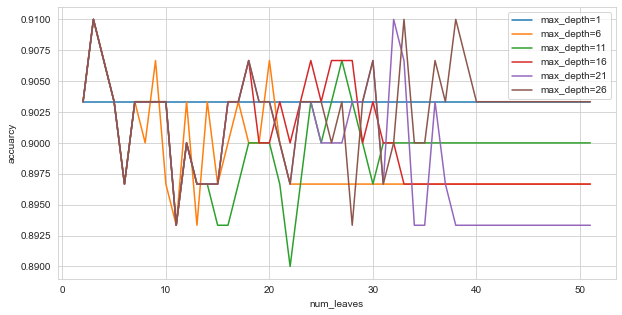

In [45]:
plt.figure(figsize=(10,5))
for depth in range(1, 31, 5):
    lgbm_acc_vs_depth(train_X, train_y, test_X, test_y, Depth=depth, Leafs=51)
    plt.legend()
plt.show()

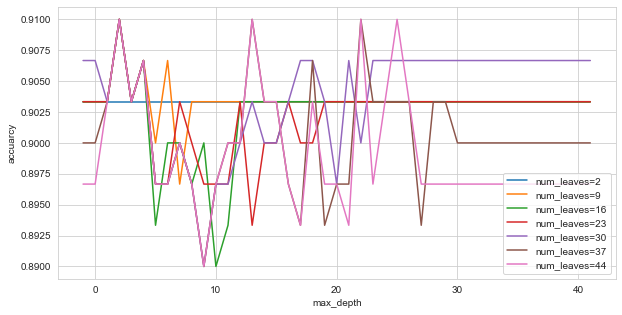

In [46]:
plt.figure(figsize=(10,5))
for leaf in range(2, 51, 7):
    lgbm_acc_vs_leaf(train_X, train_y, test_X, test_y, Depths=41, Leaf=leaf)
    plt.legend()
plt.show()

In [47]:
best_max_depth = 0
best_num_leaves = 0
best_accuracy = 0

for depth in range(1, 31):
    for leaf in range(2, 51):
        score = lightGBM_accuracy(train_X, train_y, test_X, test_y, max_depth=depth, num_leaves=leaf)
        if score > best_accuracy:
            best_accuracy = score
            best_max_depth = depth
            best_num_leaves = leaf

In [48]:
print(f"best max_depth: {best_max_depth}\nbest num_leaves: {best_num_leaves}\naccuracy: {best_accuracy}")

best max_depth: 4
best num_leaves: 6
accuracy: 0.9133333333333333


In [49]:
lgb_model = LGBMClassifier()
lgb_model.fit(train_X, train_y)
print(lgb_model.score(test_X, test_y))

0.9


## Plotting the decision boundaries of the three models

### For AdaBoost Classifier

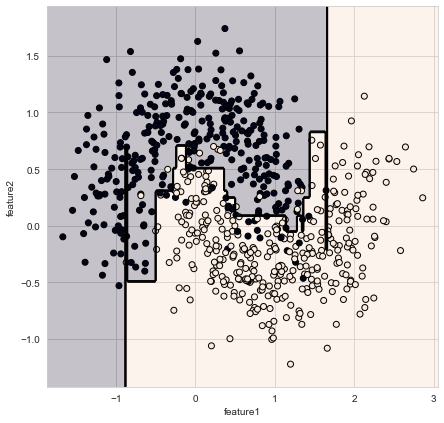

In [50]:
plot_decision_boundary(ab_model, train_X, train_y, 'feature1', 'feature2', figsize=(7,7))

### For XGBoost Model

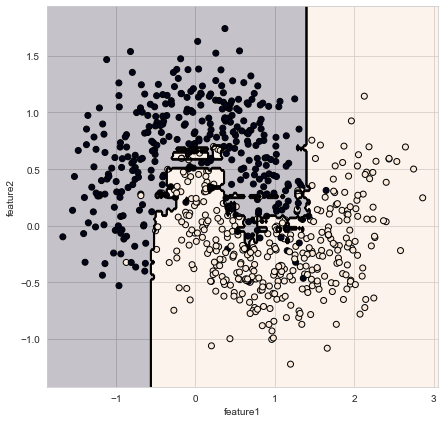

In [51]:
plot_decision_boundary(xgb_model, train_X, train_y, 'feature1', 'feature2', figsize=(7,7))

### For LightGBM Model

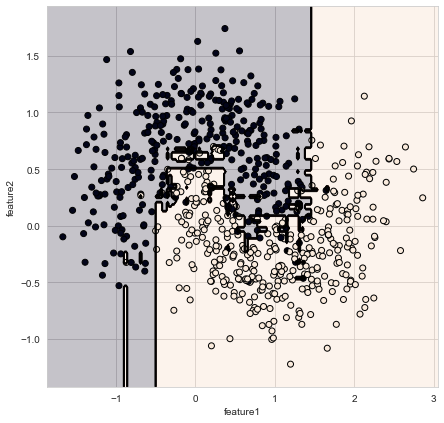

In [52]:
plot_decision_boundary(lgb_model, train_X, train_y, 'feature1', 'feature2', figsize=(7,7))

---
# Question-3
---

## Training a Bayes Model

### Hyperparameter Tuning

In [53]:
best_param = 0
best_accuracy = 0
var_smoothing_array = np.logspace(0,-9, num=100)

for va in var_smoothing_array:
    model = GaussianNB(var_smoothing=va)
    model.fit(train_X, train_y)
    score = model.score(test_X, test_y)
    
    if score > best_accuracy:
        best_accuracy = score
        best_param = va

In [54]:
print(f"best var_smoothing: {best_param}\naccuracy: {best_accuracy}")

best var_smoothing: 0.02310129700083159
accuracy: 0.8633333333333333


In [55]:
bayes_model = GaussianNB(var_smoothing=best_param)
bayes_model.fit(train_X, train_y)

GaussianNB(var_smoothing=0.02310129700083159)

In [56]:
bayes_model.score(test_X, test_y)

0.8633333333333333

## Training a VotingClassifier

In [57]:
estimators = [('rf', rf_clf), ('xgb', xgb_model), ('bagging', bagging_clf), ('gnb', bayes_model)]
voting_clf = VotingClassifier(estimators=estimators)
voting_clf.fit(train_X, train_y)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=0)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('bagging', BaggingClassifier(random_state=0)),
                             ('gnb',
                              GaussianNB(var_smoothing=0.02310129700083159))])

In [58]:
voting_clf.score(test_X, test_y)

0.92